In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load The Datasets

In [30]:
df = pd.read_csv('Data_Clean_Titles.csv')


### 1. Rename the column and replace special Characters 
### 2. Set the index number

In [33]:
df['genres'] = df['genres'].str.split(", ")
df = df.explode('genres')
df.rename(columns={'genres': 'genre'},inplace=True)


In [38]:
df['genre'] = df['genre'].str.replace("[", '').str.replace("]", '')
df['genre']=df['genre'].astype(str)
df=df.reset_index(level=None,drop=True)

### ------------Visulaization----------------
### Task-1 : Distribution of IMDb Scores
### Task-2 : Runtime vs IMDb Score based on Type
### Task-3 : Movie counts by Type
### Task-4 : IMDb Score by Age Certification
### Task-5 : Revenue Distribution
### Task-6 : IMDb Score vs Revenue
### Task-7 : Average Revenue by Country
### Task-8 : IMDb Score over the Years
### Task-9 : IMDb Votes vs Popularity
### Task-10 : Correlation Heatmap


### 1. Distribution of IMDb Scores

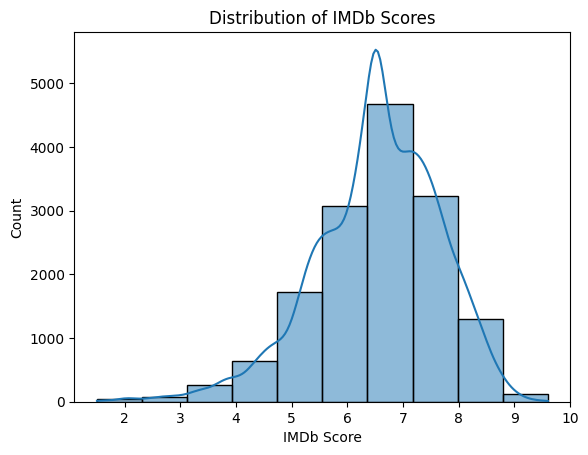

In [40]:
#Boxplot: Revenue by Age Certification
sns.histplot(df['imdb_score'], kde=True, bins=10)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show()

### 2. Runtime vs IMDb Score based on Type

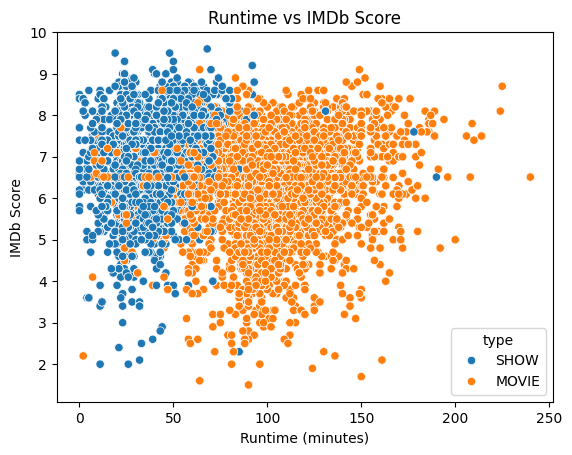

In [41]:
sns.scatterplot(data=df, x='runtime', y='imdb_score', hue='type')
plt.title('Runtime vs IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

### 3. Movie counts by Type

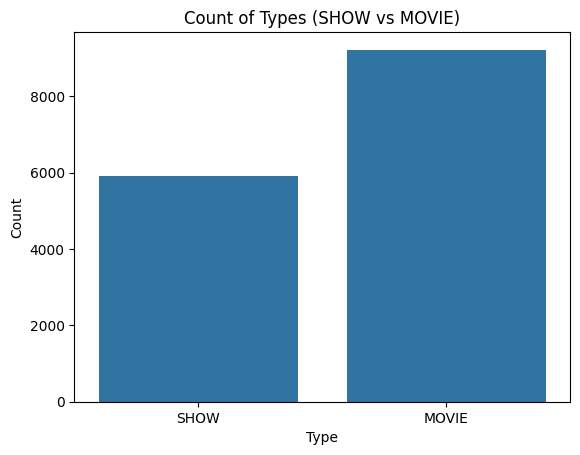

In [42]:
sns.countplot(data=df, x='type')
plt.title('Count of Types (SHOW vs MOVIE)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### IMDb Score by Age Certification

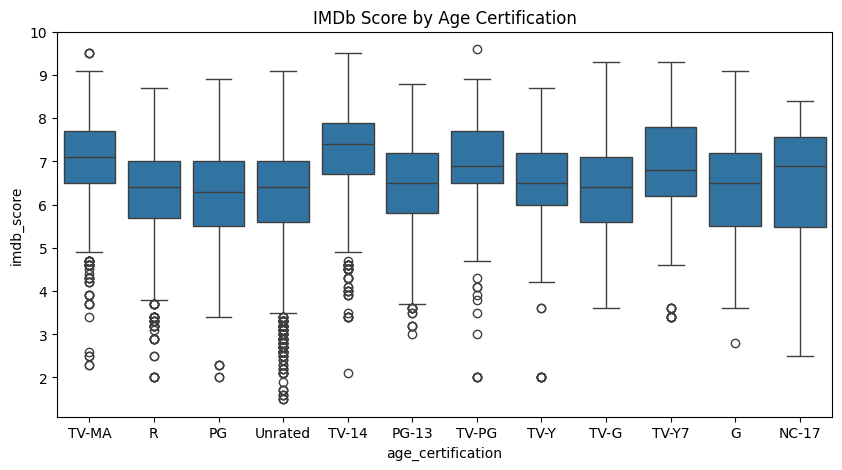

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='age_certification', y='imdb_score')
plt.title('IMDb Score by Age Certification')
plt.show()


### 5. Revenue Distribution

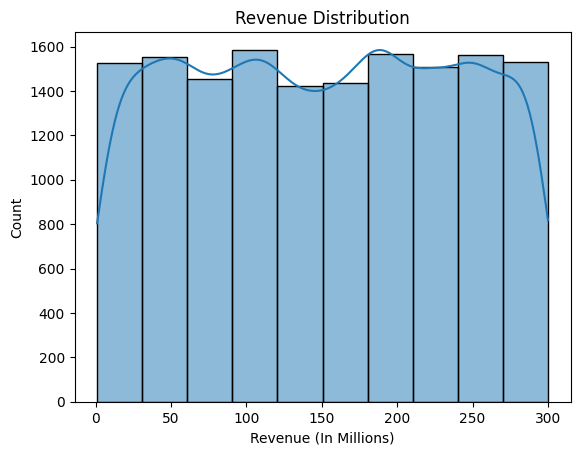

In [45]:
sns.histplot(df['Revenue(In Millions)'], bins=10, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue (In Millions)')
plt.ylabel('Count')
plt.show()
# which follow a uniform distribution

### 6. IMDb Score vs Revenue

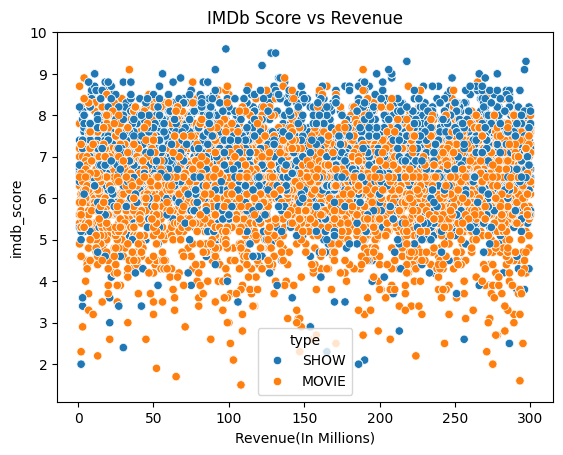

In [49]:
sns.scatterplot(data=df, x='Revenue(In Millions)', y='imdb_score', hue='type')
plt.title('IMDb Score vs Revenue')
plt.show()


### 7. Average Revenue by Country
    steps:-
        --> selct fist country as value
        --> use groupby with "country" use agg function as mean
        --> Since there are 97 col use top 10 country

In [66]:
import ast

def extract_first_country(country_str):
    try:
        countries = ast.literal_eval(country_str)
        if isinstance(countries, list) and countries:
            return countries[0]
    except (ValueError, SyntaxError):
        pass
    return None  # or 'Unknown' if you prefer a string

df['country'] = df['production_countries'].apply(extract_first_country)
country_revenue = df.groupby('country')['Revenue(In Millions)'].mean().reset_index()
country_revenue=country_revenue.sort_values(by='Revenue(In Millions)',ascending=False).reset_index().iloc[:10,:]

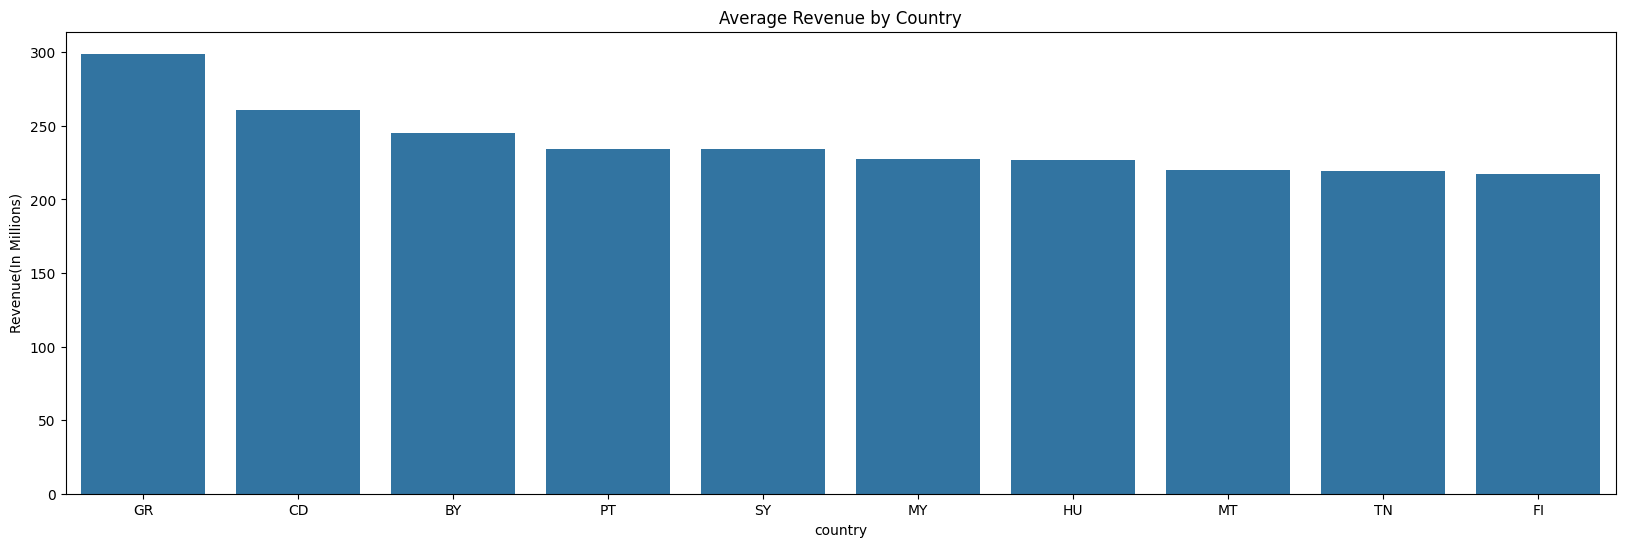

In [67]:
plt.figure(figsize=[20,6])
sns.barplot(data=country_revenue, x='country', y='Revenue(In Millions)')
plt.title('Average Revenue by Country')
plt.show()

### 8. IMDb Score over the Years

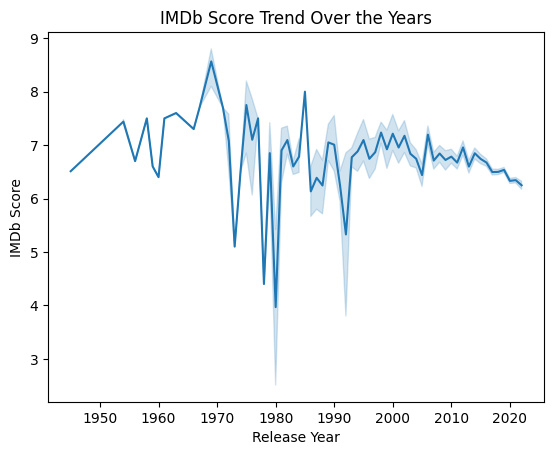

In [68]:
sns.lineplot(data=df.sort_values('release_year'), x='release_year', y='imdb_score')
plt.title('IMDb Score Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.show()

### 9. IMDb Votes vs Popularity

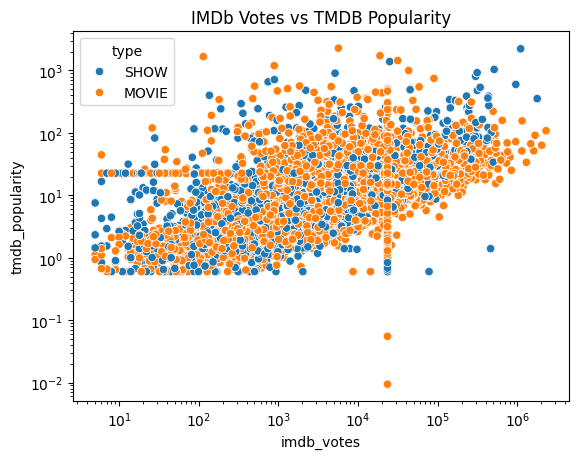

In [71]:
sns.scatterplot(data=df, x='imdb_votes', y='tmdb_popularity', hue='type')
plt.title('IMDb Votes vs TMDB Popularity')
plt.xscale(value="log")
plt.yscale(value="log")
plt.show()


###  11. Correlation Heatmap

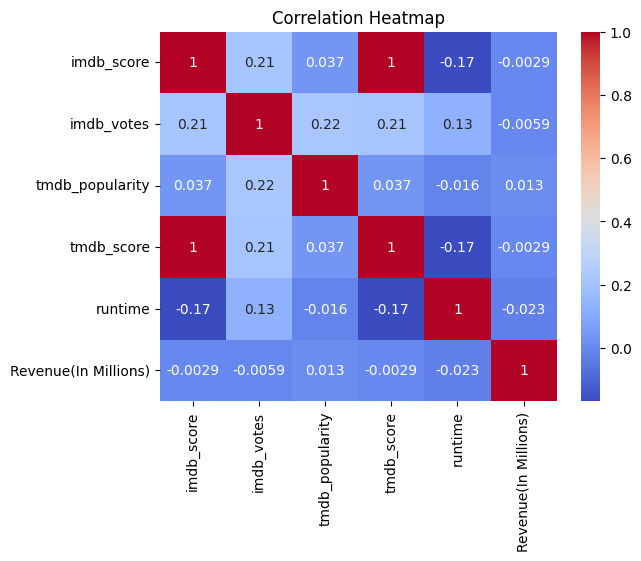

In [72]:
sns.heatmap(df[['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'runtime', 'Revenue(In Millions)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
